In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
# Loading the datasets
train_data = '/content/drive/MyDrive/train.csv'
test_data = '/content/drive/MyDrive/test.csv'
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

Data Cleaning & EDA

In [ ]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
missing_values_train = train_df.isnull().sum()
print(missing_values_train)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


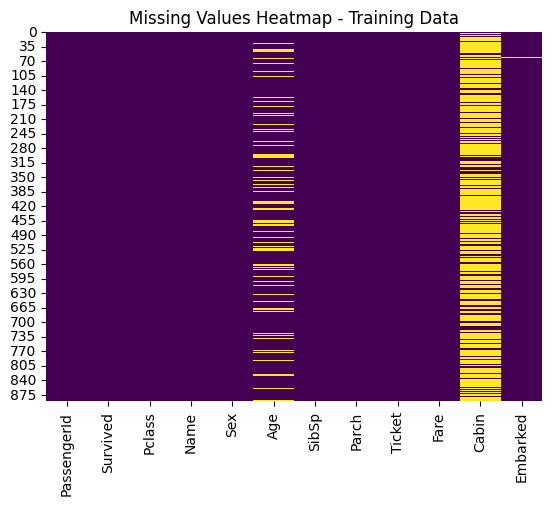

In [ ]:
# Visualizing missing values in the training dataset
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Training Data')
plt.show()

In [ ]:
# Filling missing values in the training dataset
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)


In [ ]:
#checking for the missing values
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
# Checking for missing values in the test dataset
missing_values_test = test_df.isnull().sum()
print(missing_values_test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


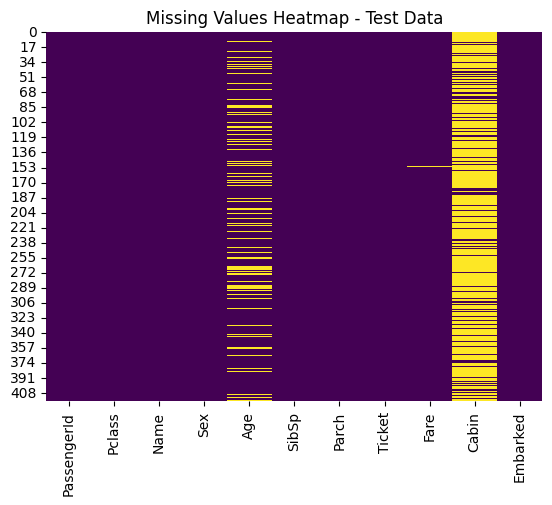

In [ ]:
# Visualizing missing values in the test dataset
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Test Data')
plt.show()

In [ ]:
# Filling missing values in the test dataset
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
#checking for the missing values
print(test_df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
# Handling outliers in 'Fare' column using IQR method
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Capping the outliers
train_df['Fare'] = np.where(train_df['Fare'] < lower_bound, lower_bound, train_df['Fare'])
train_df['Fare'] = np.where(train_df['Fare'] > upper_bound, upper_bound, train_df['Fare'])

test_df['Fare'] = np.where(test_df['Fare'] < lower_bound, lower_bound, test_df['Fare'])
test_df['Fare'] = np.where(test_df['Fare'] > upper_bound, upper_bound, test_df['Fare'])


In [ ]:
# Feature Engineering
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = np.where(train_df['FamilySize'] == 1, 1, 0)
test_df['IsAlone'] = np.where(test_df['FamilySize'] == 1, 1, 0)

train_df['Title'] = train_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                             'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')


In [ ]:
# Printing columns to verify they are present
print("Columns in train_df before encoding:")
print(train_df.columns)

print("Columns in test_df before encoding:")
print(test_df.columns)


Columns in train_df before encoding:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')
Columns in test_df before encoding:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')


In [ ]:
# Encoding categorical features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)



In [ ]:
# Ensure test_df has the same dummy variables as train_df
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

test_df = test_df[train_df.columns]


In [ ]:
# Dropping non-numeric columns for correlation matrix
numeric_df = train_df.select_dtypes(include=[np.number])


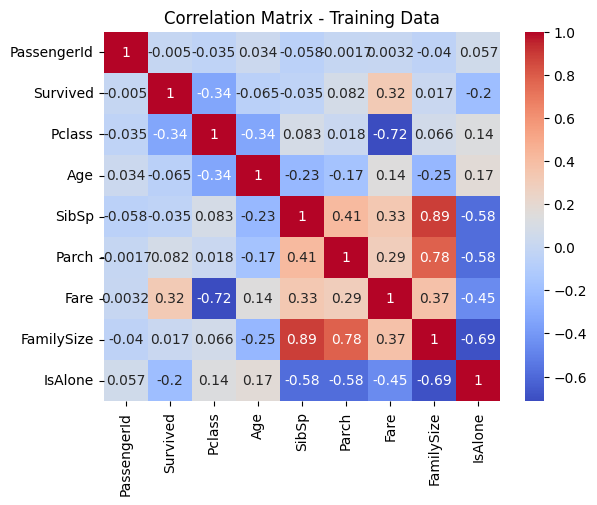

In [ ]:
# Correlation matrix for the training dataset
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Training Data')
plt.show()

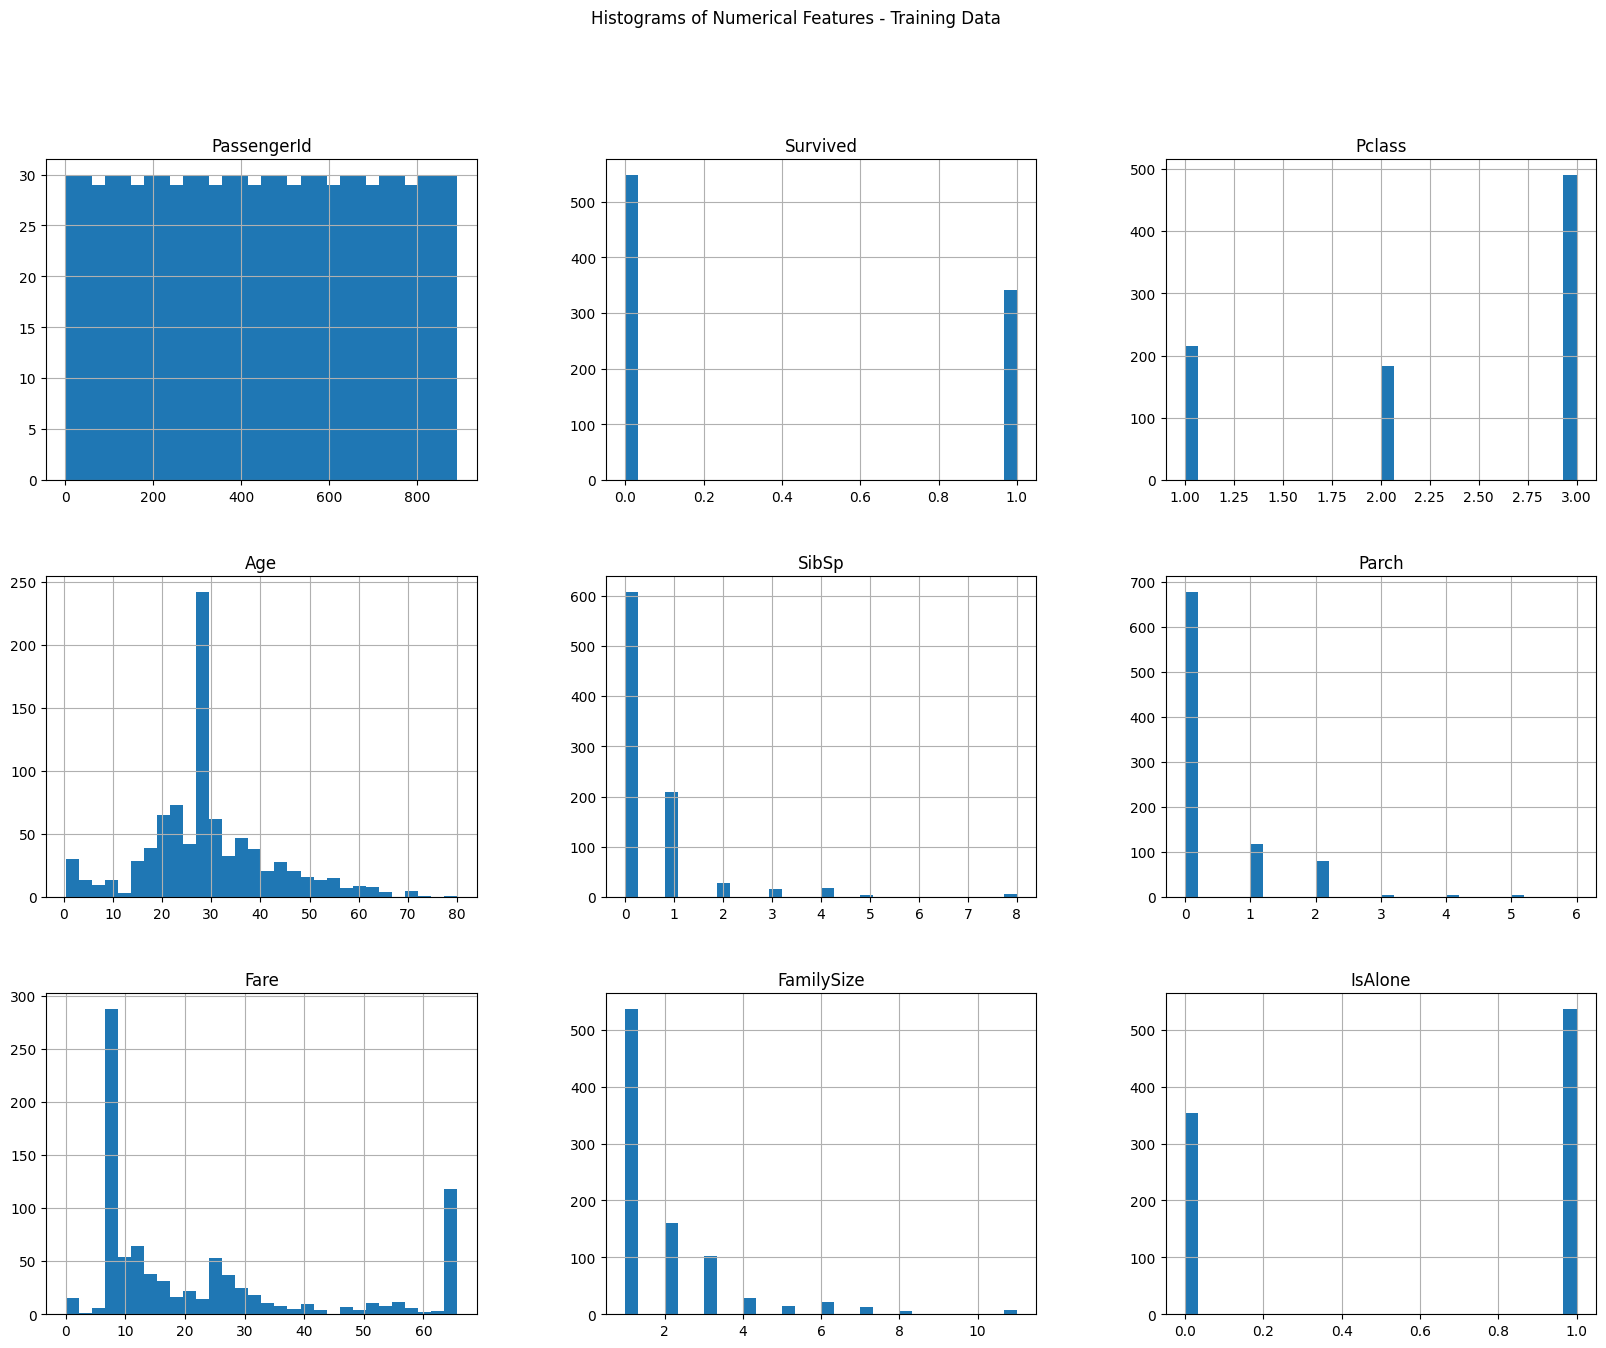

In [ ]:
# Distribution of numerical features
# training dataset
train_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features - Training Data')
plt.show()

In [ ]:
# Updated list of categorical features after encoding
categorical_features = ['Sex_male', 'Pclass', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


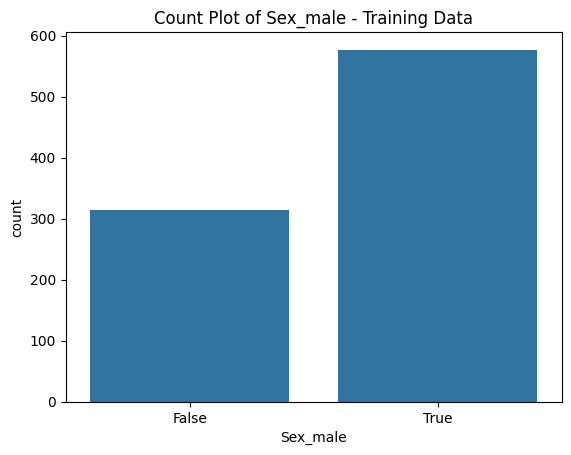

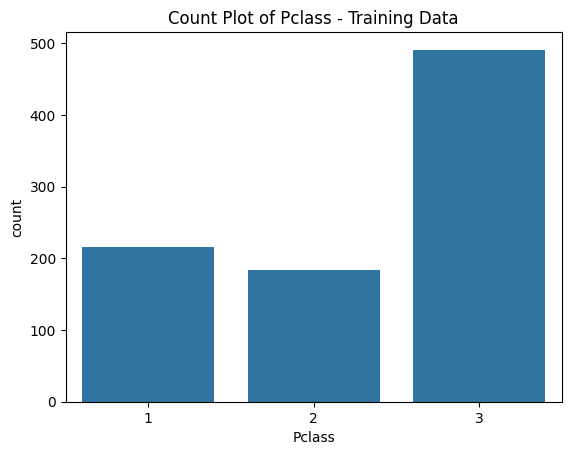

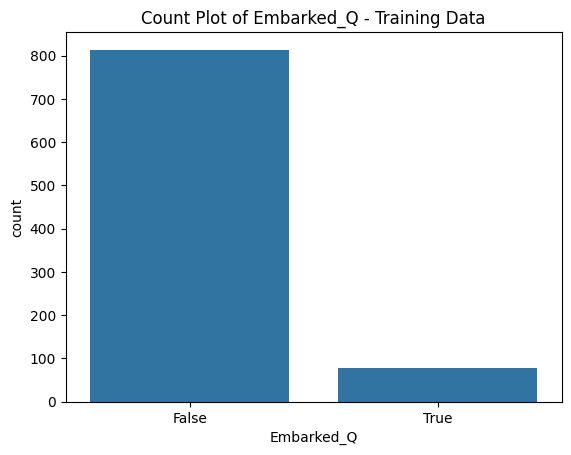

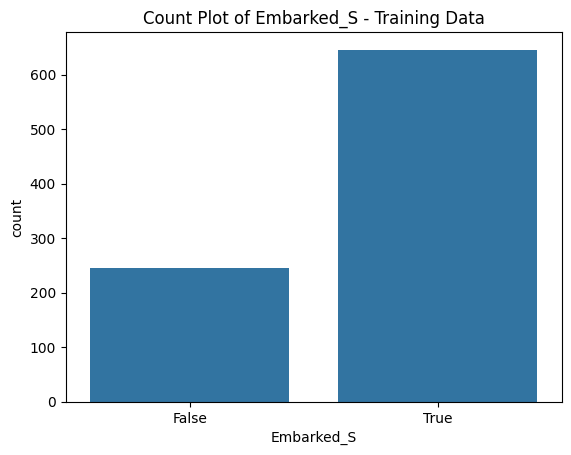

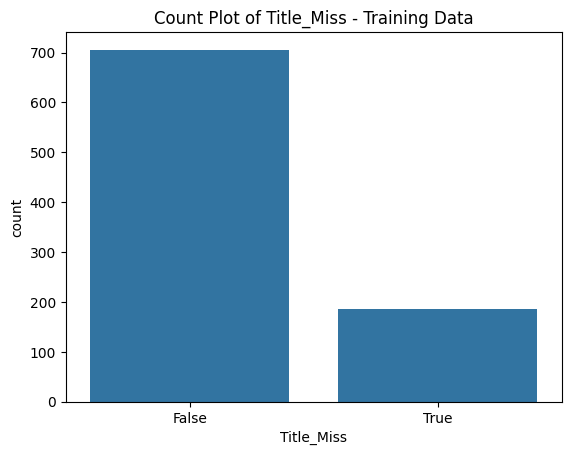

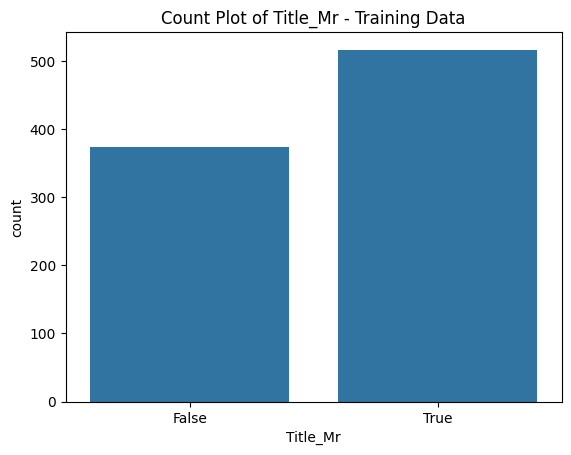

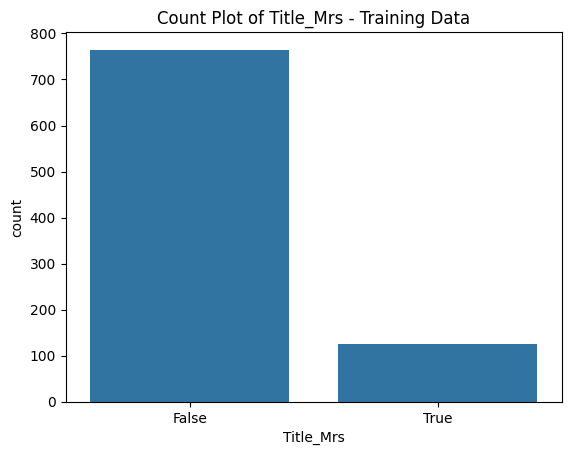

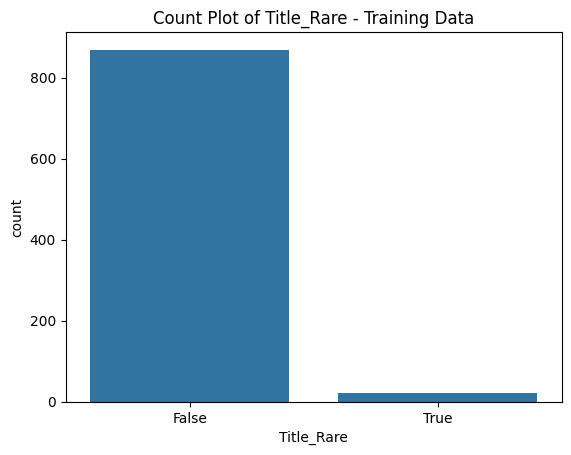

In [ ]:
# Count plots for categorical features in the training dataset
for feature in categorical_features:
    sns.countplot(data=train_df, x=feature)
    plt.title(f'Count Plot of {feature} - Training Data')
    plt.show()

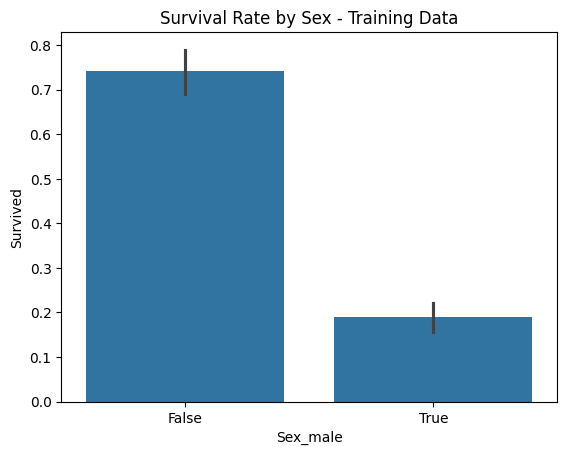

In [ ]:
# Survival rate by Sex in the training dataset
sns.barplot(data=train_df, x='Sex_male', y='Survived')
plt.title('Survival Rate by Sex - Training Data')
plt.show()

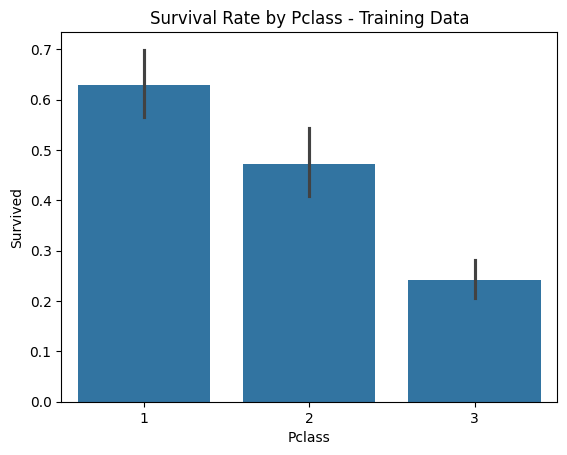

In [ ]:
# Survival rate by Pclass in the training dataset
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass - Training Data')
plt.show()

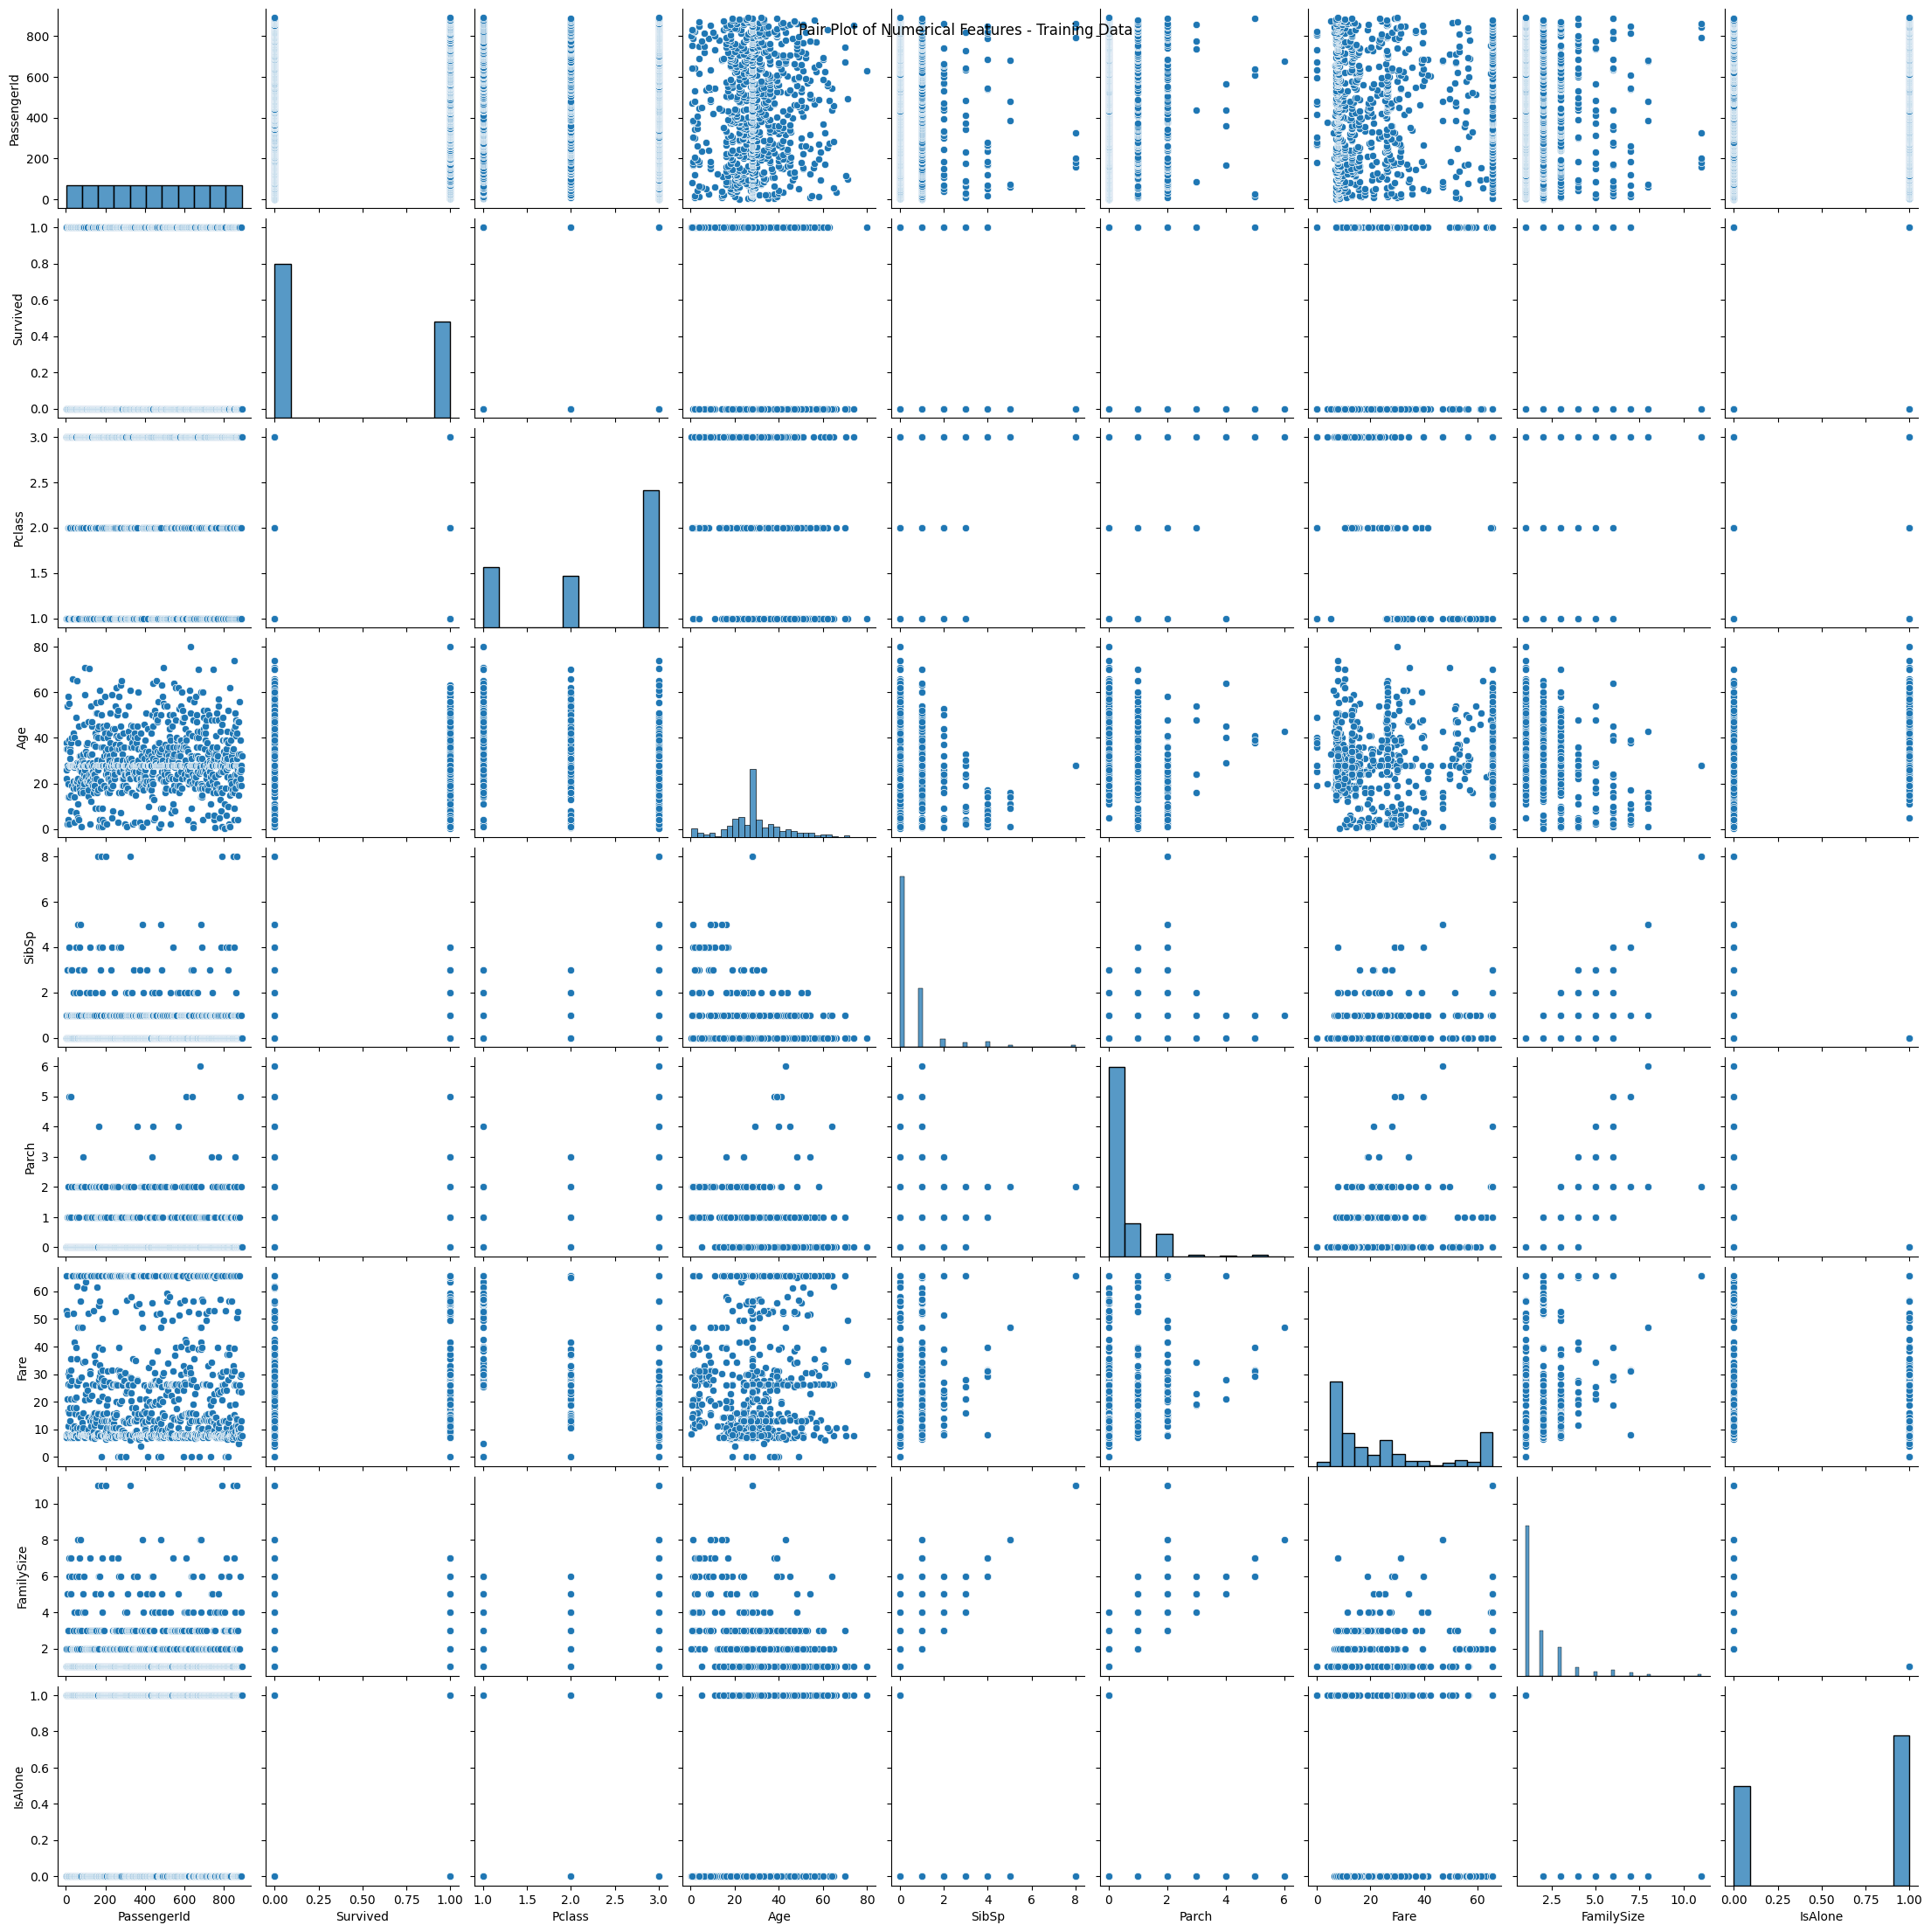

In [ ]:
# Pair plot to see interactions between variables in the training dataset
sns.pairplot(train_df.select_dtypes(['number']).dropna())
plt.suptitle('Pair Plot of Numerical Features - Training Data')
plt.show()

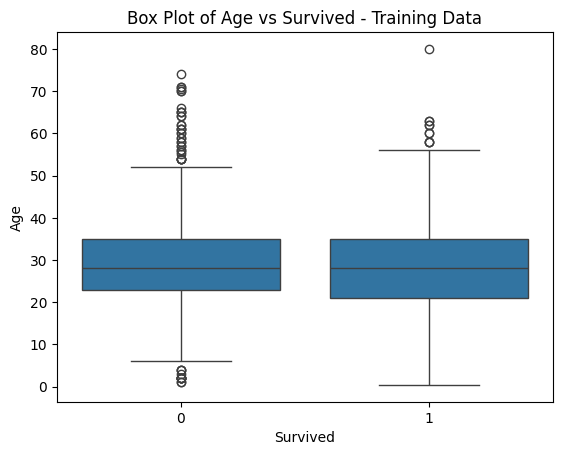

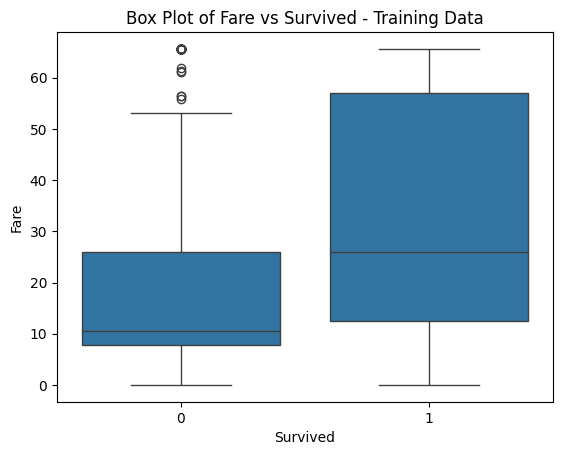

In [ ]:
# Box plots for numerical features vs Survived in the training dataset
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    sns.boxplot(data=train_df, x='Survived', y=feature)
    plt.title(f'Box Plot of {feature} vs Survived - Training Data')
    plt.show()

In [ ]:
# Summary statistics of the test dataset
print(test_df.describe())

       PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   418.000000     418.0  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000       0.0    2.265550   29.599282    0.447368    0.392344   
std     120.810458       0.0    0.841838   12.703770    0.896760    0.981429   
min     892.000000       0.0    1.000000    0.170000    0.000000    0.000000   
25%     996.250000       0.0    1.000000   23.000000    0.000000    0.000000   
50%    1100.500000       0.0    3.000000   27.000000    0.000000    0.000000   
75%    1204.750000       0.0    3.000000   35.750000    1.000000    0.000000   
max    1309.000000       0.0    3.000000   76.000000    8.000000    9.000000   

             Fare  FamilySize     IsAlone  Title_the Countess  
count  418.000000  418.000000  418.000000               418.0  
mean    24.485896    1.839713    0.605263                 0.0  
std     20.878993    1.519072    0.489380                 0.0  
min      0.000000    1.

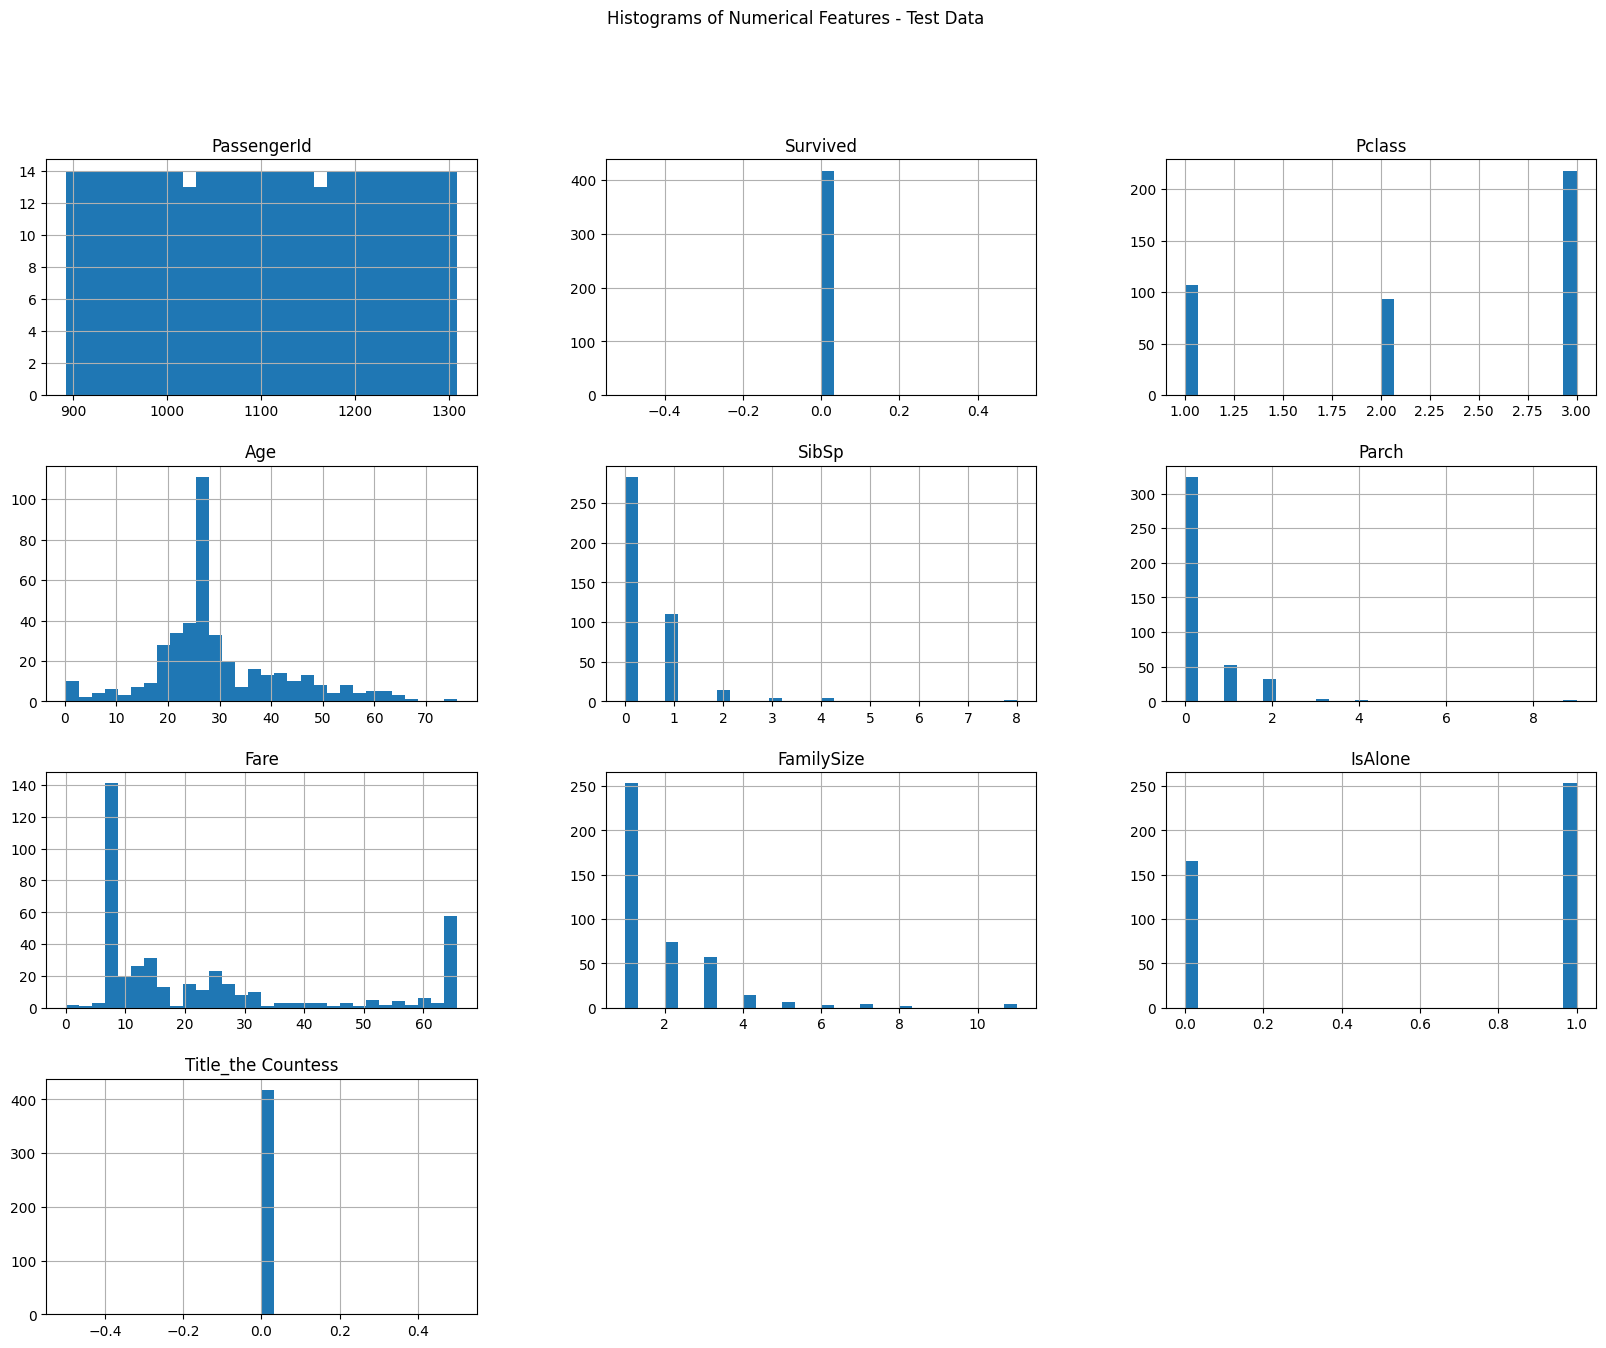

In [ ]:
# Distribution of numerical features in the test dataset
test_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features - Test Data')
plt.show()

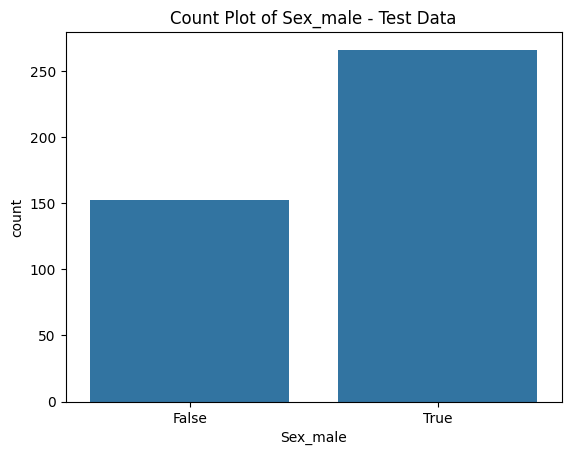

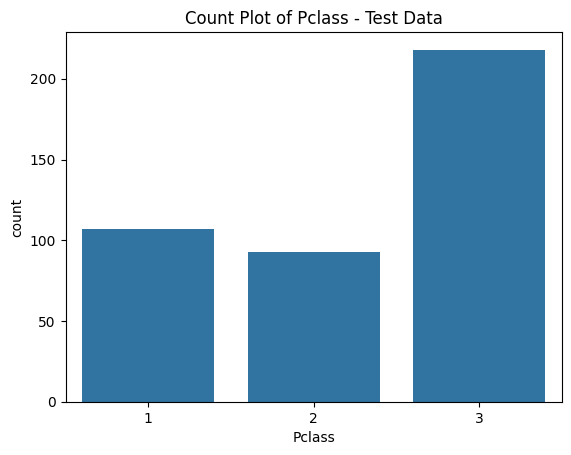

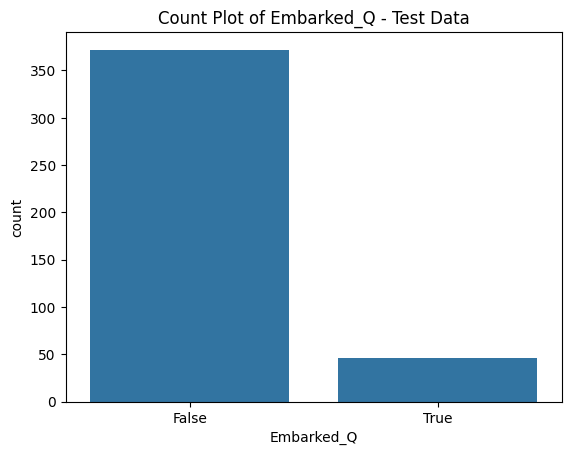

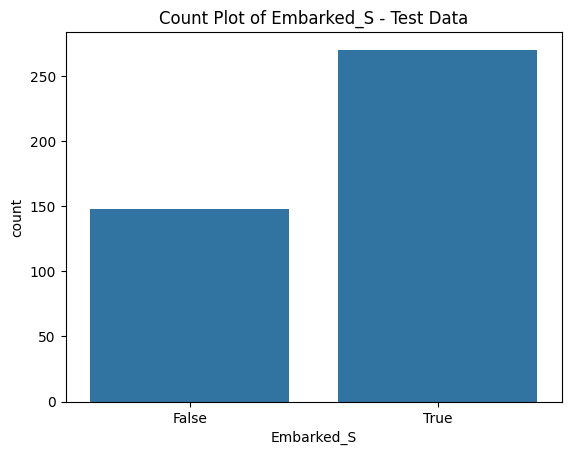

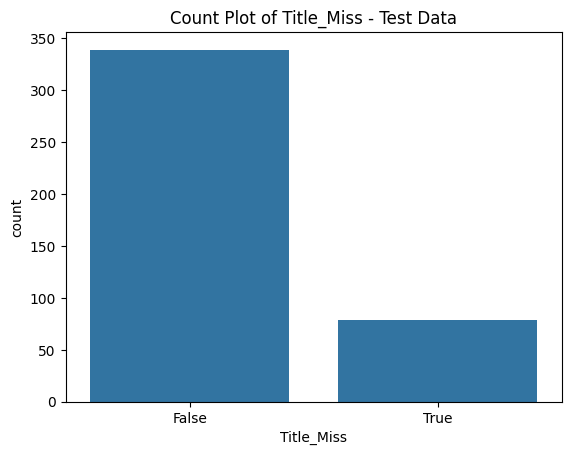

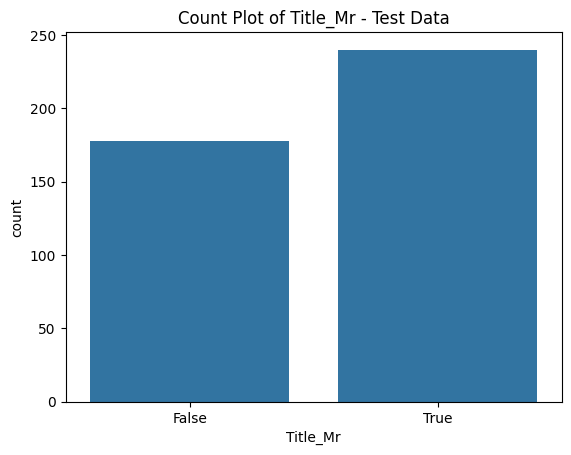

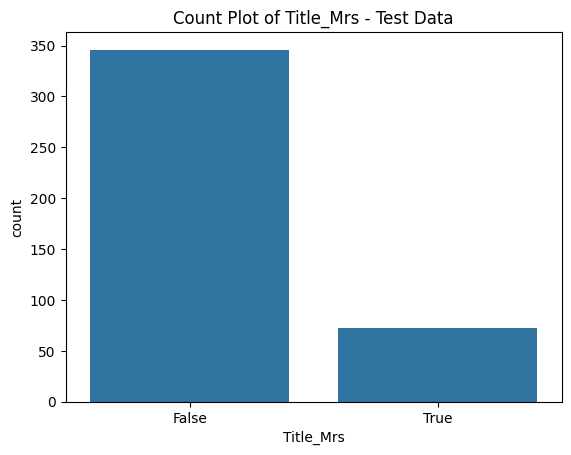

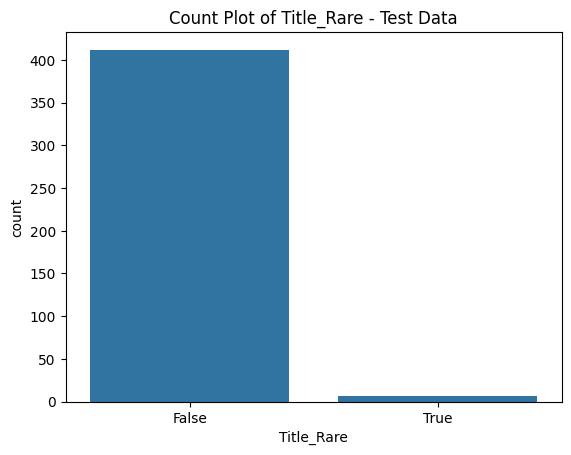

In [ ]:
# Count plots for categorical features in the test dataset
for feature in categorical_features:
    sns.countplot(data=test_df, x=feature)
    plt.title(f'Count Plot of {feature} - Test Data')
    plt.show()

Relationship between variables.

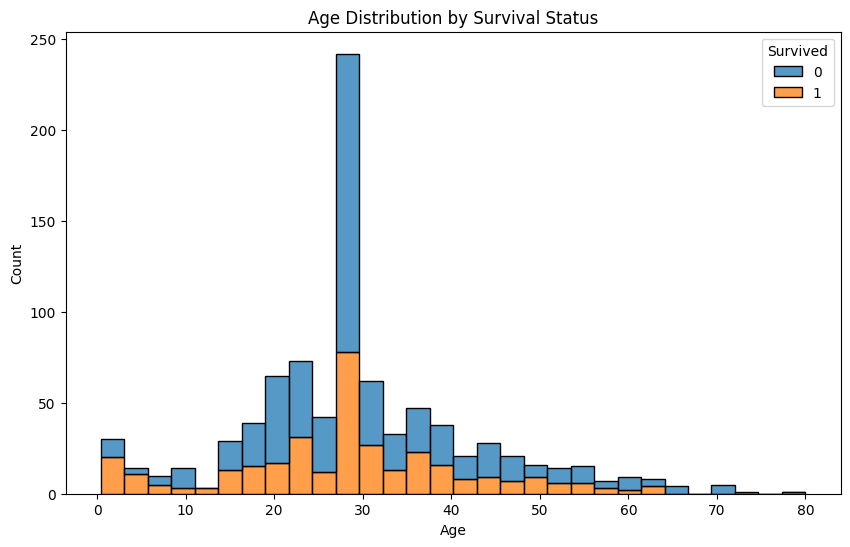

In [ ]:
# Age vs. Survival Rate
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


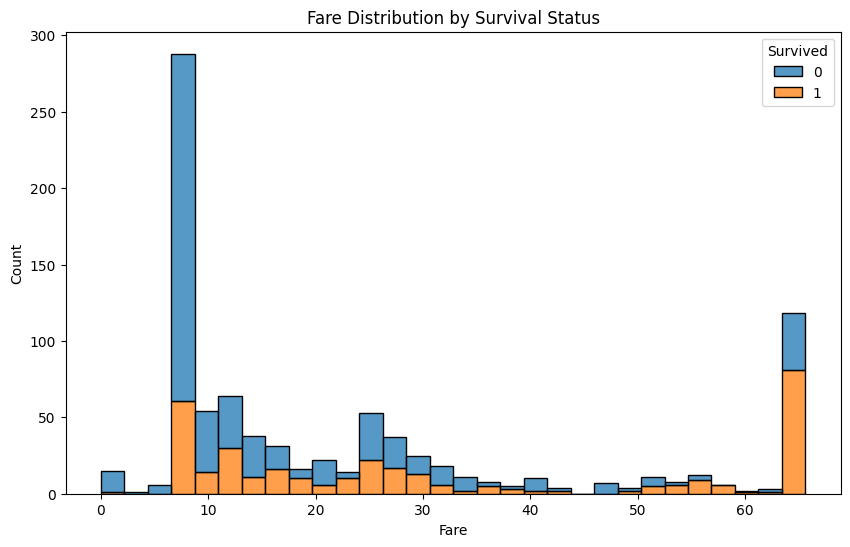

In [ ]:
# Fare vs. Survival Rate
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

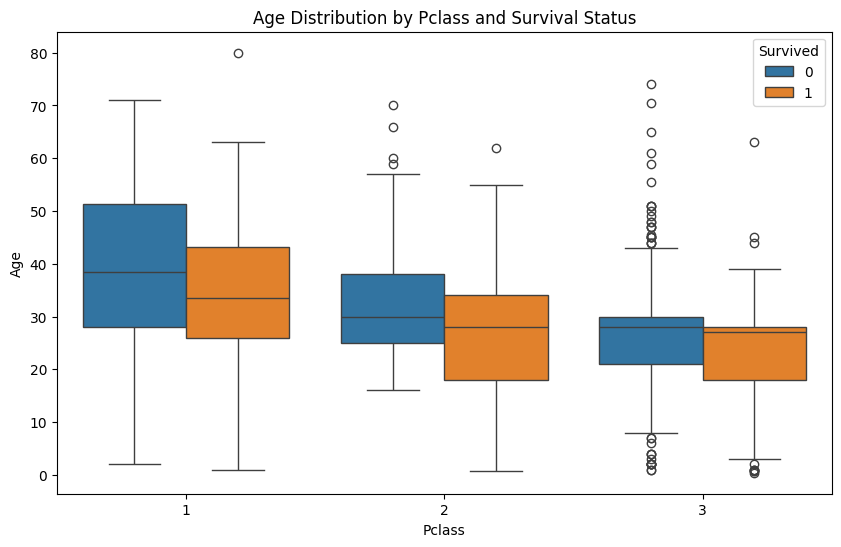

In [ ]:
# Pclass vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Pclass', y='Age', hue='Survived')
plt.title('Age Distribution by Pclass and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

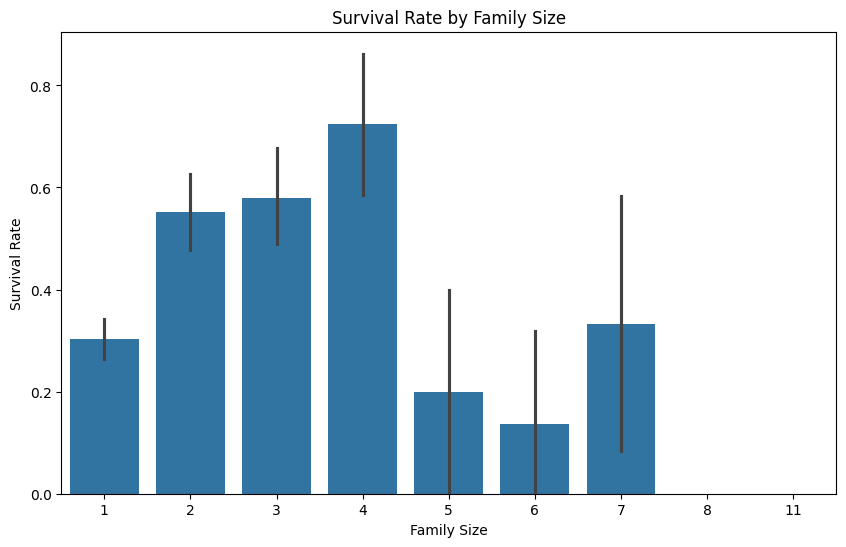

In [ ]:
# FamilySize vs. Survival Rate
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

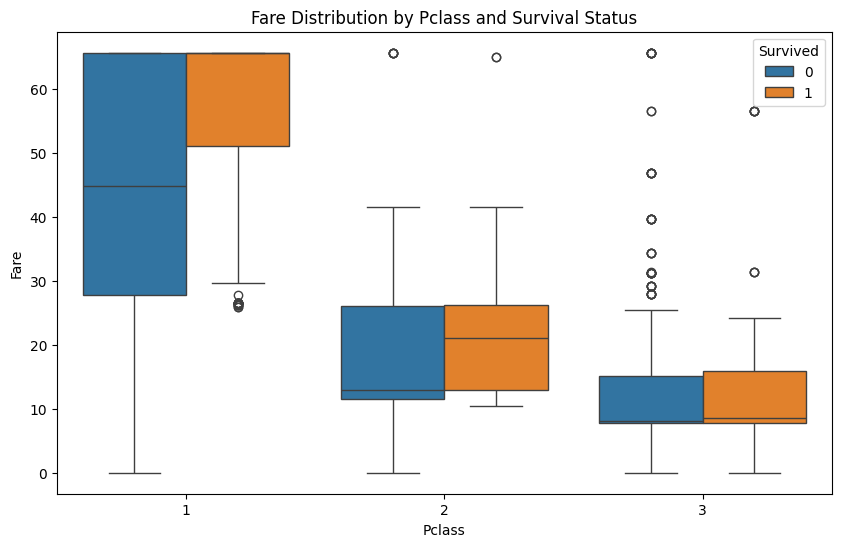

In [ ]:
# Pclass and Fare vs. Survival Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Pclass', y='Fare', hue='Survived')
plt.title('Fare Distribution by Pclass and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

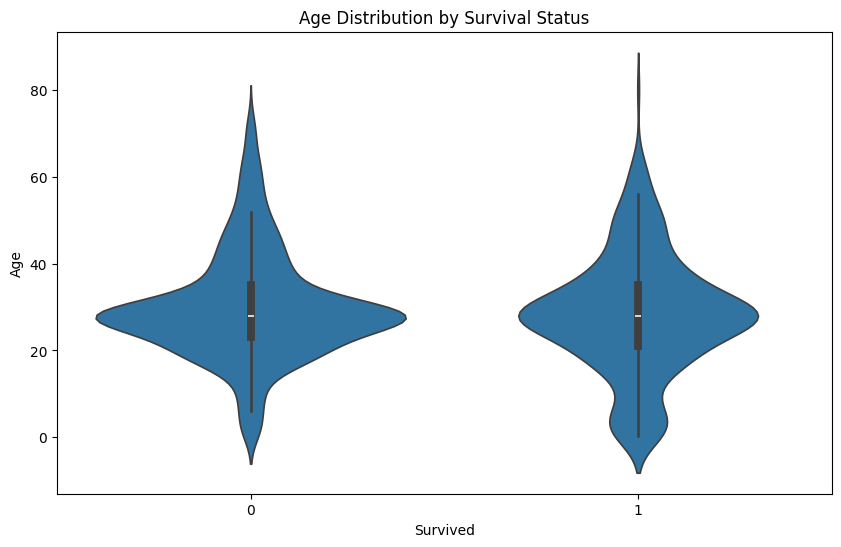

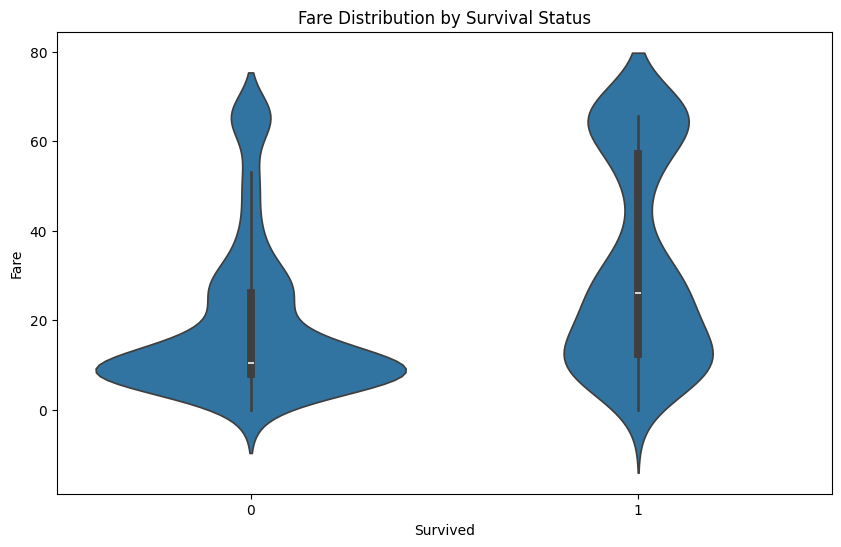

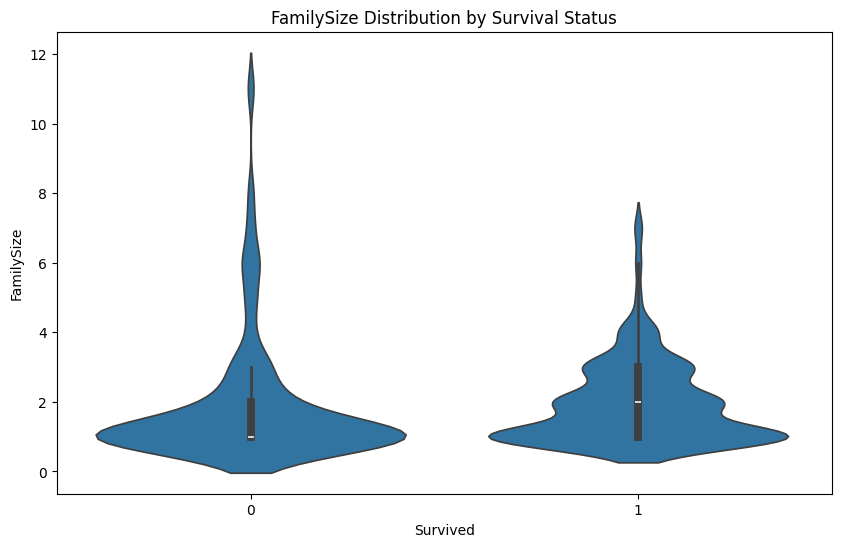

In [ ]:
# Relationship between numerical variables and survival
numerical_features = ['Age', 'Fare', 'FamilySize']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=train_df, x='Survived', y=feature)
    plt.title(f'{feature} Distribution by Survival Status')
    plt.xlabel('Survived')
    plt.ylabel(feature)
    plt.show()